In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

In [6]:
df = pd.read_csv(r"C:\Users\Naveen kumar\Downloads\archive (3).csv")

In [7]:
df.shape

(10000, 14)

In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
pd.set_option("display.max_columns",None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
print(df["Surname"].unique())

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [15]:
for col in df.columns:
  print(col,df[col].unique)
  print("-"*100)

RowNumber <bound method Series.unique of 0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64>
----------------------------------------------------------------------------------------------------
CustomerId <bound method Series.unique of 0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64>
----------------------------------------------------------------------------------------------------
Surname <bound method Series.unique of 0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object>

In [16]:
print(df["Exited"].value_counts())


Exited
0    7963
1    2037
Name: count, dtype: int64


In [17]:
df.shape

(10000, 14)

In [18]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.head(9)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
def plot_histogram(df,column_name):

  plt.figure(figsize=(10,6))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")

  #calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean,color="green",linestyle="--",label="Mean")
  plt.axvline(col_median,color="red",linestyle="--",label="Median")

  plt.legend()

  plt.show()


C:\Users\Naveen kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


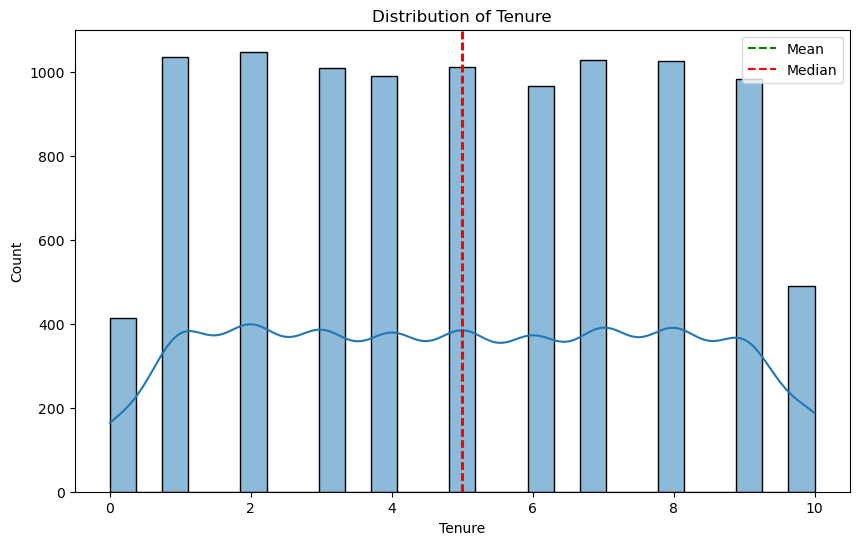

In [22]:
plot_histogram(df,"Tenure")

C:\Users\Naveen kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


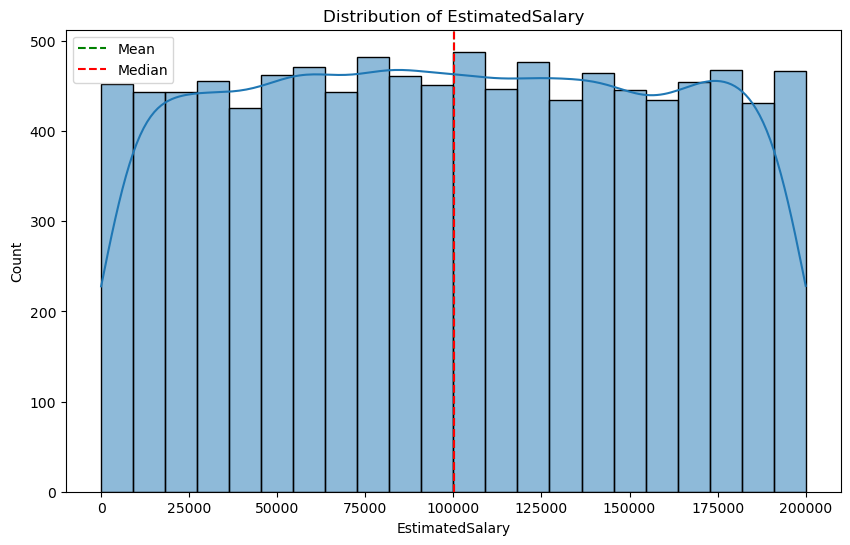

In [23]:
plot_histogram(df,"EstimatedSalary")

C:\Users\Naveen kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


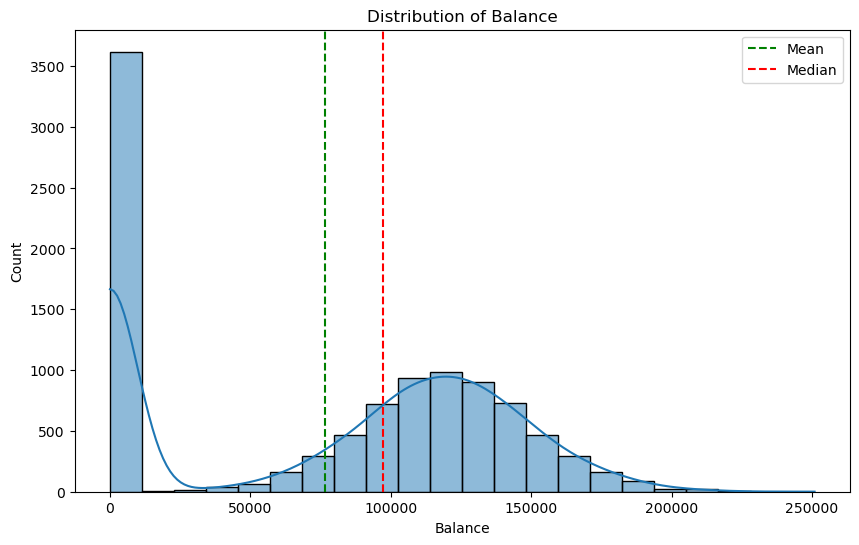

In [24]:
plot_histogram(df,"Balance")

In [25]:
def plot_boxplot(df,column_name):

  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[column_name])
  plt.title(f"Distribution  of {column_name}")
  plt.ylabel(column_name)
  plt.show

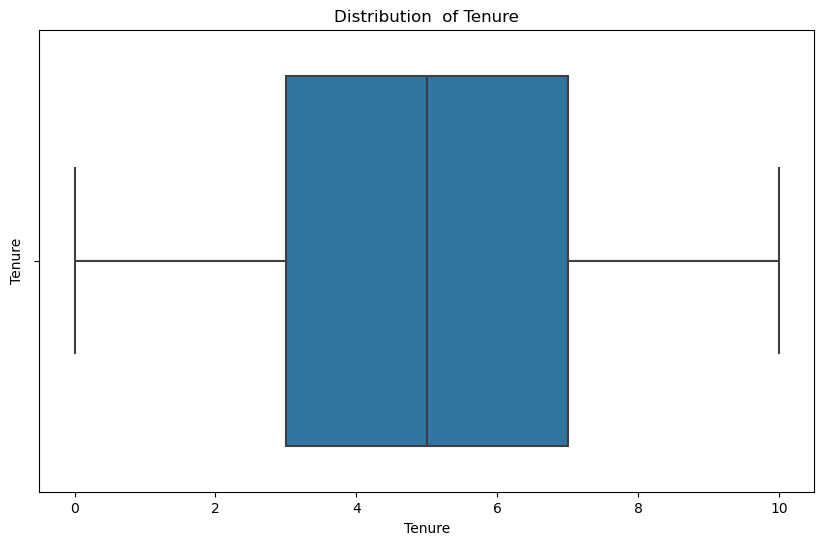

In [26]:
plot_boxplot(df,"Tenure")

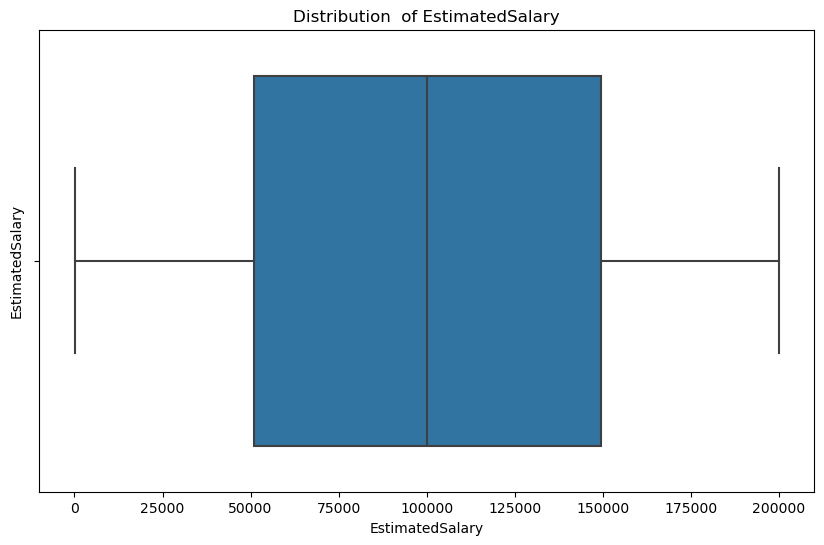

In [27]:
plot_boxplot(df,"EstimatedSalary")

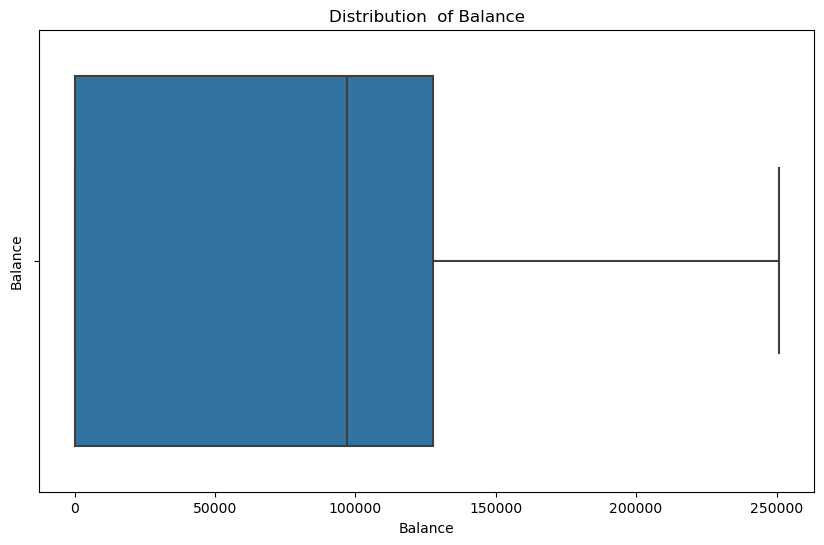

In [28]:
plot_boxplot(df,"Balance")

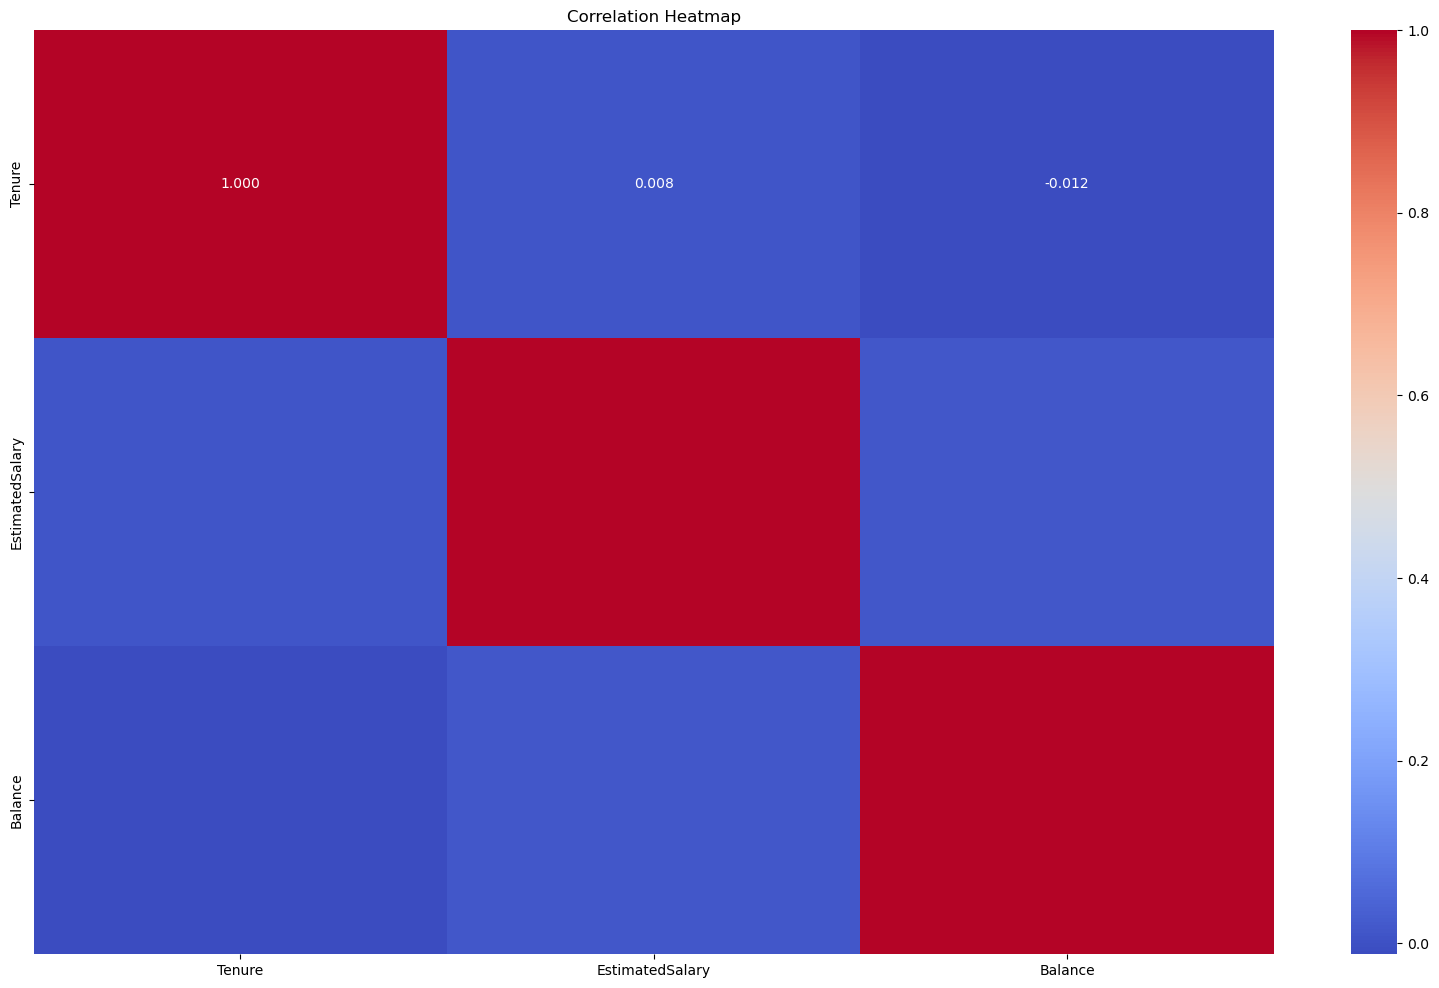

In [29]:
#correlation matrix - heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df[["Tenure","EstimatedSalary","Balance"]].corr(),annot=True,cmap="coolwarm",fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
#Data Preprocessing

#label encoding for target column
df["Exited"] = df["Exited"].replace({"True":1,"False":0})

In [31]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
print(df["Exited"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [33]:
object_columns=df.select_dtypes(include="object").columns

In [34]:
#initialize a dictionary to save the encoders
encoders={}
#apply label encoding and store encoders
for column in object_columns:
  label_encoder= LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column]= label_encoder


  #save the encoders to a pickle file
  with open("encoders.pkl","wb")as f:
    pickle.dump(encoders,f)

In [35]:
encoders

{'Surname': LabelEncoder(),
 'Geography': LabelEncoder(),
 'Gender': LabelEncoder()}

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [37]:
#splitting the features and target
X=df.drop(columns=["Exited"])
Y=df["Exited"]

In [38]:
print(X)

      RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0             1    15634602     1115          619          0       0   42   
1             2    15647311     1177          608          2       0   41   
2             3    15619304     2040          502          0       0   42   
3             4    15701354      289          699          0       0   39   
4             5    15737888     1822          850          2       0   43   
...         ...         ...      ...          ...        ...     ...  ...   
9995       9996    15606229     1999          771          0       1   39   
9996       9997    15569892     1336          516          0       1   35   
9997       9998    15584532     1570          709          0       0   36   
9998       9999    15682355     2345          772          1       1   42   
9999      10000    15628319     2751          792          0       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     

In [39]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [40]:
#split training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=24)

In [41]:
print(X_train.shape)

(6000, 13)


In [42]:
print(Y_train.shape)

(6000,)


In [43]:
print(X_train.value_counts())

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary
1          15634602    1115     619          0          0       42   2       0.00       1              1          1               101348.88          1
6657       15795640    1660     683          1          0       35   1       132371.30  2              0          0               186123.57          1
6675       15759034    1550     654          0          1       36   2       112262.84  1              1          0               12873.39           1
6674       15736299    212      729          0          0       36   8       109106.80  1              0          0               121311.12          1
6673       15660403    900      827          2          0       35   0       0.00       2              0          1               184514.01          1
                                                                                                   

In [44]:
print(Y_train.value_counts())

Exited
0    4793
1    1207
Name: count, dtype: int64


In [45]:
smote=SMOTE(random_state=24)

In [46]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [47]:
print(Y_train_smote.shape)

(9586,)


In [48]:
print(Y_train.value_counts)

<bound method IndexOpsMixin.value_counts of 8953    1
5516    0
1441    0
228     1
8877    0
       ..
6500    0
5249    1
3473    1
8535    1
899     0
Name: Exited, Length: 6000, dtype: int64>


In [49]:
#dictionary of models
models={
    "Decision Tree": DecisionTreeClassifier(random_state=24),
    "Random Forest": RandomForestClassifier(random_state=24),
    "XGBoost":XGBClassifier(random_state=24)
}

In [50]:
#dictionary to store the cross valildation results
cv_scores={}
#perform 5-fold cross validation each model
for model_name,model in models.items():
  print(f"Training{model_name}with default parameters")
  scores=cross_val_score(model,X_train_smote,Y_train_smote,cv=6,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")

TrainingDecision Treewith default parameters
Decision Tree cross-validation accuracy: 0.78
TrainingRandom Forestwith default parameters
Random Forest cross-validation accuracy: 0.86
TrainingXGBoostwith default parameters
XGBoost cross-validation accuracy: 0.87


In [51]:
cv_scores

{'Decision Tree': array([0.71276596, 0.75844806, 0.8135169 , 0.80037547, 0.80525986,
        0.81715717]),
 'Random Forest': array([0.74780976, 0.83667084, 0.90112641, 0.89674593, 0.90419537,
        0.9010645 ]),
 'XGBoost': array([0.78035044, 0.84230288, 0.89549437, 0.90863579, 0.89668128,
        0.89229806])}

In [52]:
rfc=RandomForestClassifier(random_state=26)

In [53]:
model.fit(X_train_smote,Y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=24, ...)

In [54]:
#evaluate on test data
Y_test_pred = model.predict(X_test)
print("Accuracy score:\n",accuracy_score(Y_test,Y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_test_pred))
print("Classification Report:\n", classification_report(Y_test,Y_test_pred))

Accuracy score:
 0.8165
Confusion Matrix:
 [[2760  410]
 [ 324  506]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      3170
           1       0.55      0.61      0.58       830

    accuracy                           0.82      4000
   macro avg       0.72      0.74      0.73      4000
weighted avg       0.82      0.82      0.82      4000



In [55]:
#save the trained model as a pickle file
model_data = {"model":rfc,"features_names":X.columns.tolist()}
with open("customer_churn_model.pkl","wb")as f:
    pickle.dump(model_data,f)

In [56]:
#load the saved model and the feature names
with open("customer_churn_model.pkl","rb")as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [57]:
print(loaded_model)

RandomForestClassifier(random_state=26)


In [58]:
print(feature_names)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [59]:
# Training the model
loaded_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=26)

In [60]:
data = {
    'RowNumber': 1,
    'CustomerId': 15634602,
    'Surname': 'Hargrave',
    'CreditScore': 619,
    'Geography': 'France',
    'Gender': 'Female',
    'Age': 42,
    'Tenure': 2,
    'Balance': 0,
    'NumOfProducts': 1,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 101348.88,
}
data_df=pd.DataFrame([data])
with open("encoders.pkl","rb")as f:
  encoders = pickle.load(f)

print(data_df.head())

#encode categorical features using the saved encoders
for column, encoder in encoders.items():
  data_df[column] = encoder.transform(data_df[column])

#make a prediction
prediction = loaded_model.predict(data_df)
pred_prob=loaded_model.predict_proba(data_df)
print(prediction)

#results
print(f"Prediction:{'Churn' if prediction[0]==1 else 'No Churn'}")
print(f"Prediction Probability:{pred_prob}")


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       2        0              1          1               1        101348.88  
[1]
Prediction:Churn
Prediction Probability:[[0.31 0.69]]
